In [2]:
from dotenv import load_dotenv
import pandas as pd
import csv
import os
import base64
import requests
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
from pprint import pprint
from ids import id
from ids import secret

In [3]:
load_dotenv()
client_id = id
client_secret = secret

# Asegurarse de que los Id's están presentes, porque si no, la función get token da error.
# print(client_id, client_secret)

In [4]:
# Definiendo funciones <3

def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization" : "Basic " + auth_base64,
        "Content-Type" : "application/x-www-form-urlencoded"
    }

    data = {"grant_type" : "client_credentials"}

    result = requests.post(url, headers = headers, data = data)
    json_response = json.loads(result.content)
    token = json_response["access_token"]
    return token

def get_auth_header(token):
    return{"Authorization" : "Bearer " + token}

def search_for_playlist(token, playlist_name):
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    query = f"?q={playlist_name}&type=playlist&limit=1"
    query_url = url + query
    result = requests.get(query_url, headers = headers)
    json_result_playlist = json.loads(result.content)["playlists"]["items"]
    if len(json_result_playlist) == 0:
        print("No playlist with this name found...")
        return None
    
    # pprint(json_result_playlist)
    return json_result_playlist[0]

def get_songs_in_playlist(token, artist_id):
    url = f"https://api.spotify.com/v1/playlists/{playlist_id}"
    headers = get_auth_header(token)
    result = requests.get(url, headers = headers)
    json_result = json.loads(result.content)["tracks"]["items"]
    # pprint(json_result)
    return json_result


In [5]:
token = get_token()
result = search_for_playlist(token, "Top Canciones 2019")
playlist_id = result["id"]
songs = get_songs_in_playlist(token, playlist_id)
song_list = []
for idx, song in enumerate(songs):
    # print(f'{idx + 1}. {song["track"]["name"]}')
    song_data = {"Song":song["track"]["name"],
                 "Artist":song["track"]["artists"][0]["name"],
                 "Song Lenght (ms)":song["track"]["duration_ms"],
                 "Popularity":song["track"]["popularity"],
                 "Release date":song["track"]["album"]["release_date"],
                 "Song Id":song["track"]["id"]}
    song_list.append(song_data)
# pprint(song_list)
# pprint(songs)
spoti_19 = pd.DataFrame(song_list)
spoti_19.head()

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id
0,Calma - Remix,Pedro Capó,238200,77,2018-10-05,5iwz1NiezX7WWjnCgY5TH4
1,Con Calma,Daddy Yankee,193226,83,2019-01-24,5w9c2J52mkdntKOmRLeM2m
2,Te Vi,Piso 21,231848,80,2018-12-14,059bcIhyc2SBwm6sw2AZzd
3,Otro Trago,Sech,225933,75,2019-04-19,1Ej96GIBCTvgH7tNX1r3qr
4,Callaita,Bad Bunny,250533,80,2019-05-31,2TH65lNHgvLxCKXM3apjxI


In [8]:
token = get_token()
result = search_for_playlist(token, "Top Canciones de 2020")
playlist_id = result["id"]
songs = get_songs_in_playlist(token, playlist_id)
song_list = []
for idx, song in enumerate(songs):
    # print(f'{idx + 1}. {song["track"]["name"]}')
    song_data = {"Song":song["track"]["name"],
                 "Artist":song["track"]["artists"][0]["name"],
                 "Song Lenght (ms)":song["track"]["duration_ms"],
                 "Popularity":song["track"]["popularity"],
                 "Release date":song["track"]["album"]["release_date"],
                 "Song Id":song["track"]["id"]}
    song_list.append(song_data)
# pprint(song_list)
# pprint(songs)
spoti_20 = pd.DataFrame(song_list)
spoti_20.head()

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id
0,Tusa,KAROL G,200960,79,2019-11-07,7k4t7uLgtOxPwTpFmtJNTY
1,Blinding Lights,The Weeknd,200040,93,2020-03-20,0VjIjW4GlUZAMYd2vXMi3b
2,Safaera,Bad Bunny,295176,80,2020-02-29,2DEZmgHKAvm41k4J3R2E9Y
3,Hawái,Maluma,199112,81,2020-08-21,1yoMvmasuxZfqHEipJhRbp
4,Sigues Con El,Arcángel,226532,72,2019-12-13,7sQKy5vlPQllr0k9IjYJv3


In [9]:
token = get_token()
result = search_for_playlist(token, "Top Canciones México 2021")
playlist_id = result["id"]
songs = get_songs_in_playlist(token, playlist_id)
song_list = []
for idx, song in enumerate(songs):
    # print(f'{idx + 1}. {song["track"]["name"]}')
    song_data = {"Song":song["track"]["name"],
                 "Artist":song["track"]["artists"][0]["name"],
                 "Song Lenght (ms)":song["track"]["duration_ms"],
                 "Popularity":song["track"]["popularity"],
                 "Release date":song["track"]["album"]["release_date"],
                 "Song Id":song["track"]["id"]}
    song_list.append(song_data)

spoti_21 = pd.DataFrame(song_list)
spoti_21.head()
# pprint(song_list)
# pprint(songs)

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id
0,DÁKITI,Bad Bunny,205090,82,2020-11-27,4MzXwWMhyBbmu6hOcLVD49
1,Todo De Ti,Rauw Alejandro,199604,80,2021-12-10,3rdAz1fbUfZxYgaCviYhRo
2,Botella Tras Botella,Gera MX,197333,81,2021-04-23,2MnLkFqY9Rpg9s3Zv6ZJdK
3,Yonaguni,Bad Bunny,206710,86,2021-06-04,2JPLbjOn0wPCngEot2STUS
4,BICHOTA,KAROL G,178693,75,2021-03-26,1WvrDdouh6C51In1SdATbq


In [10]:
token = get_token()
result = search_for_playlist(token, "Top Canciones México 2021")
playlist_id = result["id"]
songs = get_songs_in_playlist(token, playlist_id)
song_list = []
for idx, song in enumerate(songs):
    # print(f'{idx + 1}. {song["track"]["name"]}')
    song_data = {"Song":song["track"]["name"],
                 "Artist":song["track"]["artists"][0]["name"],
                 "Song Lenght (ms)":song["track"]["duration_ms"],
                 "Popularity":song["track"]["popularity"],
                 "Release date":song["track"]["album"]["release_date"],
                 "Song Id":song["track"]["id"]}
    song_list.append(song_data)

spoti_21 = pd.DataFrame(song_list)
spoti_21.head()
# pprint(song_list)
# pprint(songs)

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id
0,DÁKITI,Bad Bunny,205090,82,2020-11-27,4MzXwWMhyBbmu6hOcLVD49
1,Todo De Ti,Rauw Alejandro,199604,80,2021-12-10,3rdAz1fbUfZxYgaCviYhRo
2,Botella Tras Botella,Gera MX,197333,81,2021-04-23,2MnLkFqY9Rpg9s3Zv6ZJdK
3,Yonaguni,Bad Bunny,206710,86,2021-06-04,2JPLbjOn0wPCngEot2STUS
4,BICHOTA,KAROL G,178693,75,2021-03-26,1WvrDdouh6C51In1SdATbq


In [11]:
token = get_token()
result = search_for_playlist(token, "Top Canciones México 2022")
playlist_id = result["id"]
songs = get_songs_in_playlist(token, playlist_id)
song_list = []
for idx, song in enumerate(songs):
    # print(f'{idx + 1}. {song["track"]["name"]}')
    song_data = {"Song":song["track"]["name"],
                 "Artist":song["track"]["artists"][0]["name"],
                 "Song Lenght (ms)":song["track"]["duration_ms"],
                 "Popularity":song["track"]["popularity"],
                 "Release date":song["track"]["album"]["release_date"],
                 "Song Id":song["track"]["id"]}
    song_list.append(song_data)

spoti_22 = pd.DataFrame(song_list)
spoti_22.head()
# pprint(song_list)
# pprint(songs)

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id
0,Me Porto Bonito,Bad Bunny,178567,93,2022-05-06,6Sq7ltF9Qa7SNFBsV5Cogx
1,Tití Me Preguntó,Bad Bunny,243716,90,2022-05-06,1IHWl5LamUGEuP4ozKQSXZ
2,Ojitos Lindos,Bad Bunny,258298,91,2022-05-06,3k3NWokhRRkEPhCzPmV8TW
3,Efecto,Bad Bunny,213061,90,2022-05-06,5Eax0qFko2dh7Rl2lYs3bx
4,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,198937,93,2022-07-06,2tTmW7RDtMQtBk7m2rYeSw


In [17]:
#Tomar la columna Song Id del DataFrame con los Top Tracks y convertir los valores en una lista de strings separadas por comas, para pasarlo así al request de los Audio Features

id_list_19 = spoti_19["Song Id"]
id_list_19 = ",".join(id_list_19)
id_list_19


'5iwz1NiezX7WWjnCgY5TH4,5w9c2J52mkdntKOmRLeM2m,059bcIhyc2SBwm6sw2AZzd,1Ej96GIBCTvgH7tNX1r3qr,2TH65lNHgvLxCKXM3apjxI,0s5DNDV6LAKn2u2Ufa3VjQ,1LIqNVhaIgxXUt2eVoIQJ3,5W83ErFkO3aKAIS1WMi6u0,0fea68AdmYNygeTGI4RC18,6FyRXC8tJUh863JCkyWqtk,7KbF6AdprOXEEHlsq11Z6d,1c0hsvHLELX6y8qymnpLKL,2qG5sZ7Si6sdK74qLxedYM,46lvmzK8wxAy66tjzXXSh0,2ksOAxtIxY8yElEWw8RhgK,2beS6dD5rovBxSA1zYoSHR,7g8YaUQABMal0zWe7a2ijz,3f5lA8nnc4YYF1qf78WpHw,5BDP2tky8oMQJPS33frKVp,3gE4eQH3K83Sght0ZLvuBK,6WkJ2OK163XXS2oARUC9JM,3KkXRkHbMCARz0aVfEt68P,6ocbgoVGwYJhOv1GgI9NsF,0TK2YIli7K1leLovkQiNik,2Fxmhks0bxGSBdJ92vM42m,6o8ogTrSX8H0F66Pdz3Tsc,7hbk4BaF66O09R1gq0bKwj,4lzxJ4jCuFDXXGkE1LmpKR,5PXsZaT8cOxb4mXrA20PMQ,4PJ3umtW1aWdfh5EITHc6T,0KHhNlHN5lWn7q332PiPys,0KoiMHhqKLoL4xM54rcWYY,25ZAibhr3bdlMCLmubZDVt,0akyEssGRVHstqCSWXusJL,4THusowxdHxwt0HBh5pyRx,32lexhcz93AinKK0qLTZaZ,1LiN0Z98FkR1t0m8KmLcAH,1nocRtwyNPVtGcIJqfgdzZ,7BuHdm4lQqcyG3qTwdkxus,4Clmg1g8n2yBYG13Z1oSdG,4yVO0wOhXsZC1RuPgHP524,2LIh4uzqq9cXMPzzmcToHl,1mT47pKLXUwPYGwB91GcNz,6De0lHrwBf

In [12]:
#Sacar ID List para las canciones de 2020
id_list_20 = spoti_20["Song Id"]
id_list_20 = ",".join(id_list_20)
id_list_20


'7k4t7uLgtOxPwTpFmtJNTY,0VjIjW4GlUZAMYd2vXMi3b,2DEZmgHKAvm41k4J3R2E9Y,1yoMvmasuxZfqHEipJhRbp,7sQKy5vlPQllr0k9IjYJv3,0SqqAgdovOE24BzxIClpjw,1cVlW9WQiGlFdWUXFdFZGh,4uziEsK1yiqdauKVDPsmVG,41wtwzCZkXwpnakmwJ239F,3mQ6SLdxxaL52Yte7KF2Ks,2n7ohqg1s68ToAHh4u9mcW,2lCkncy6bIB0LTMT7kvrD1,38RIEav39FGi86jppxO0du,3PfIrDoz19wz7qK7tYeu62,6bvfJf4KjonPMuPfGfy3S2,7paFC3FEu1WtPVP4Do6VZN,1bRpSCFv6P2OUhciByeRYR,6NfrH0ANGmgBXyxgV2PeXt,5stPVcRqb4qixbafP9e8lt,3ZG8N7aWw2meb6UrI5ZmnZ,0jT8Nl0shPS8115is0wD2Q,69vlMrzHwATKzupwNcUPyK,5NyS3oxTlos3Agl2YtZwrC,4dKY6JFNvj2yWzENIL1P6s,3JHpk0DOTOzyh0777JFAky,7na7Bk98usp84FaOJFPv3d,50ZC4PM7hywH27RcCfViau,2rc7BkzO8qepMFAxHtOrXc,4r9jkMEnArtWGH2rL2FZl0,4HYDUMY0xSpeBr0AMY9cUz,6zEgnpM0qYmHLDnh8WPejL,7x4ASXYEKfQBCewcZhK776,3gD4J3RUHy4OUuZ3qAiaiG,2tnVG71enUj33Ic2nFN6kZ,7CtbxAGq2P0jtYh6SH9DMR,7jYZU1CIruZU3puB5tiYiW,017PF4Q3l4DBUiWoXk4OWT,63Zaf8Rci6eOUPqDQ4fUFx,3Dv1eDb0MEgF93GpLXlucZ,0EhpEsp4L0oRGM0vmeaN5e,5aJ1M43pinROpwaPnO8KRj,6RyaV7owmVU6fzEPE17sF1,7eJMfftS33KTjuF7lTsMCx,6UelLqGlWM

In [13]:
#Sacar ID List para las canciones de 2021
id_list_21 = spoti_21["Song Id"]
id_list_21 = ",".join(id_list_21)
id_list_21


'4MzXwWMhyBbmu6hOcLVD49,3rdAz1fbUfZxYgaCviYhRo,2MnLkFqY9Rpg9s3Zv6ZJdK,2JPLbjOn0wPCngEot2STUS,1WvrDdouh6C51In1SdATbq,7Bk0uXKk1uPT0XuQbpFzvs,1xK1Gg9SxG8fy2Ya373oqb,2XIc1pqjXV3Cr2BQUGNBck,1yoMvmasuxZfqHEipJhRbp,6tDDoYIxWvMLTdKpjFkc1B,2rCbl9naJYhaxjLsfx88uM,6D2TCm4nf5nxAcdGJ7w3QP,4loQgPwJHocL3dFwLfjb1J,7E9GeFGfjXw9LAI4ay6rsw,4H3t8C59tXjKf1R2iKtc5M,798ahLNEcoFER7Vywg1FMT,0VjIjW4GlUZAMYd2vXMi3b,2B4GHvToeLTOBB4QLzW3Ni,2dNhNlpZAtV4lwAFW45LIv,1s59X35jDULAyOGmBuTAnd,16ONd70tvWAaLIc6hcLzaG,05bfbizlM5AX6Mf1RRyMho,4nbWX2HzrOEnX4xxvYRCyU,5RubKOuDoPn5Kj5TLVxSxY,5QO79kh1waicV47BqGRL3g,079Ey5uxL04AKPQgVQwx5h,2FSGUA0gFgGeQdprjtGM2M,3VvA1wSxukMLsvXoXtlwWx,4HYDUMY0xSpeBr0AMY9cUz,7D93pJcwymzaZx8WgBo2zG,0fea68AdmYNygeTGI4RC18,2vmfvSoZBFAt9hhRoEByLi,78QcVmzxS0wIwuC2rpAauI,0akyEssGRVHstqCSWXusJL,0vtYnEw1eJwW26BrBnOAYJ,4jcxBTrNvyqMJdMDyyjdYV,35UUpTmrcFXNIVIN26ujXl,4HzqWEdAbzcVFDv0pvxV4w,3lR4O0vtkhCAvVEUEWUL0S,5wANPM4fQCJwkGd4rN57mH,2bgcUk2A3jjKbCJ7KPquTi,3p6eieHX6oEOzJStPtEsLu,5nujrmhLynf4yMoMtj8AQF,55mzJ0LftL

In [14]:
#Sacar ID List para las canciones de 2022
id_list_22 = spoti_22["Song Id"]
id_list_22 = ",".join(id_list_22)
id_list_22


'6Sq7ltF9Qa7SNFBsV5Cogx,1IHWl5LamUGEuP4ozKQSXZ,3k3NWokhRRkEPhCzPmV8TW,5Eax0qFko2dh7Rl2lYs3bx,2tTmW7RDtMQtBk7m2rYeSw,7dSZ6zGTQx66c2GF91xCrb,6Xom58OOXk2SoU711L2IXO,4tYFy8ALRjIZvnvSLw5lxN,74WROFXsox6wkeUrEK2DS6,4gzsuuZypVbxs0Af1LSZyB,6mmPpaltUZK7xjNlBPQQ0p,4Dvkj6JhhA12EX05fT7y2e,31i56LZnwE6uSu3exoHjtB,0UXlu64mDLvfzR8IXMz06J,5kpxVMDvYGRmNqawPqDTYR,2JPLbjOn0wPCngEot2STUS,1O2pcBJGej0pmH2Y9XZMs6,3p6eieHX6oEOzJStPtEsLu,3ZGkdrigbWXLgHungXfZkt,7FlQk2gJ6TBrHHiidvdR2O,5ww2BF9slyYgNOk37BlC4u,1UdzJEpgJxtuXAlCOvD4S0,798ahLNEcoFER7Vywg1FMT,2rurDawMfoKP4uHyb2kJBt,41oY4WCTj5kccfesTVFnvN,75UMtPC77vqKRwfSuYuNPO,5TMLavqGRKNxgzMBrVpC9R,5IdyvWCaUa7AgTxMsFj0wB,1797zYiX4cKosMH836X9Gt,6ylDpki1VpIsc525KC1ojF,6y8z28epOv5FlaxDv1Lo5B,0fea68AdmYNygeTGI4RC18,3rdAz1fbUfZxYgaCviYhRo,44XjoNvtwevktFKjvVe1vH,6YNTL320OEMAg4ORqGYt1v,4r9jkMEnArtWGH2rL2FZl0,1dm6z1fWB0cErMszU25dy2,2NWaWZZLFMcr5P4uI2KvWy,4MzXwWMhyBbmu6hOcLVD49,6HIIuuUIEzH1meVdGbMXyf,6VrQTLzzuyGIYjUDe4kAZk,4w273WCBXwM4P3jTX5HkB2,23Lyy7ZXRvzfgH4JtDkKrX,3HgvO4B5LL

In [18]:
#Request para los Audio Features

def get_AF_in_songs(token, id_list):
    url = f"https://api.spotify.com/v1/audio-features?ids={id_list}"
    headers = get_auth_header(token)
    response = requests.get(url, headers = headers)
    response_json = response.json()
    #pprint(response_json)
    return response_json

In [19]:
#DataFrame con los Audio Features del 2019
token = get_token()
audio_features_data = get_AF_in_songs(token, id_list_19)["audio_features"]
audio_features_list = []


for idx, af in enumerate(audio_features_data):
    audio_features = {"Acousticness":af["acousticness"],
                 "Danceability":af["danceability"],
                 "Energy":af["energy"],
                 "Instrumentalness":af["energy"],
                 "Liveness":af["energy"],
                 "Speechiness":af["speechiness"],
                 "Tempo":af["tempo"],
                 "Key" : af["key"],
                 "Loudness" : af["loudness"],
                 "Mode" : af["mode"],
                 "Time Signature" : af["time_signature"],
                 "Valence":af["valence"]}
    audio_features_list.append(audio_features)
audio_features_df = pd.DataFrame(audio_features_list)
#audio_features_df

spoti_19_af_df = pd.concat([spoti_19, audio_features_df], axis = 1)
clean_spoti_19_df = pd.DataFrame(spoti_19_af_df.loc[spoti_19_af_df["Popularity"]>40, :])
clean_spoti_19_df


,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Key,Loudness,Mode,Time Signature,Valence
0,Calma - Remix,Pedro Capó,238200,77,2018-10-05,5iwz1NiezX7WWjnCgY5TH4,0.3230,0.826,0.773,0.773,0.773,0.0524,126.899,11,-4.218,0,4,0.761
1,Con Calma,Daddy Yankee,193226,83,2019-01-24,5w9c2J52mkdntKOmRLeM2m,0.1100,0.737,0.860,0.860,0.860,0.0593,93.989,8,-2.652,0,4,0.656
2,Te Vi,Piso 21,231848,80,2018-12-14,059bcIhyc2SBwm6sw2AZzd,0.0446,0.877,0.777,0.777,0.777,0.1170,102.020,1,-4.246,1,4,0.706
3,Otro Trago,Sech,225933,75,2019-04-19,1Ej96GIBCTvgH7tNX1r3qr,0.1360,0.746,0.700,0.700,0.700,0.3410,176.044,0,-4.669,1,4,0.619
4,Callaita,Bad Bunny,250533,80,2019-05-31,2TH65lNHgvLxCKXM3apjxI,0.6000,0.610,0.624,0.624,0.624,0.3090,176.169,2,-4.773,1,4,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sucker,Jonas Brothers,181026,84,2019-06-07,22vgEDb5hykfaTwLuskFGD,0.0427,0.842,0.734,0.734,0.734,0.0588,137.958,1,-5.065,0,4,0.952
96,Cuando Nadie Ve,Morat,219586,82,2018-10-25,71iAechwVKGu26pahzFL0k,0.1330,0.806,0.778,0.778,0.778,0.0616,95.993,1,-4.577,0,4,0.840
97,Que Le De,Rauw Alejandro,225600,60,2019-01-25,08aYFNUTIOMGq93e2VSArQ,0.1900,0.770,0.750,0.750,0.750,0.0785,99.997,0,-2.715,1,4,0.609
98,Ponle,Rvssian,164764,67,2018-09-06,28O1p0bQXH2F6Qn8jBZZR4,0.1880,0.857,0.772,0.772,0.772,0.1950,94.030,10,-4.737,0,4,0.589


In [20]:
#DataFrame con los Audio Features del 2020
token = get_token()
audio_features_data = get_AF_in_songs(token, id_list_20)["audio_features"]
audio_features_list = []


for idx, af in enumerate(audio_features_data):
    audio_features = {"Acousticness":af["acousticness"],
                 "Danceability":af["danceability"],
                 "Energy":af["energy"],
                 "Instrumentalness":af["energy"],
                 "Liveness":af["energy"],
                 "Speechiness":af["speechiness"],
                 "Tempo":af["tempo"],
                 "Key" : af["key"],
                 "Loudness" : af["loudness"],
                 "Mode" : af["mode"],
                 "Time Signature" : af["time_signature"],
                 "Valence":af["valence"]}
    audio_features_list.append(audio_features)
audio_features_df = pd.DataFrame(audio_features_list)
#audio_features_df

spoti_20_af_df = pd.concat([spoti_20, audio_features_df], axis = 1)
clean_spoti_20_df = pd.DataFrame(spoti_20_af_df.loc[spoti_20_af_df["Popularity"]>40, :])
clean_spoti_20_df


,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Key,Loudness,Mode,Time Signature,Valence
0,Tusa,KAROL G,200960,79,2019-11-07,7k4t7uLgtOxPwTpFmtJNTY,0.29500,0.803,0.715,0.715,0.715,0.2980,101.085,2,-3.280,1,4,0.574
1,Blinding Lights,The Weeknd,200040,93,2020-03-20,0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,0.730,0.730,0.730,0.0598,171.005,1,-5.934,1,4,0.334
2,Safaera,Bad Bunny,295176,80,2020-02-29,2DEZmgHKAvm41k4J3R2E9Y,0.01030,0.607,0.829,0.829,0.829,0.3790,96.172,2,-4.074,1,4,0.685
3,Hawái,Maluma,199112,81,2020-08-21,1yoMvmasuxZfqHEipJhRbp,0.18500,0.783,0.727,0.727,0.727,0.3890,180.067,6,-3.454,0,4,0.558
4,Sigues Con El,Arcángel,226532,72,2019-12-13,7sQKy5vlPQllr0k9IjYJv3,0.11000,0.883,0.668,0.668,0.668,0.1130,87.972,9,-2.957,1,4,0.676
5,Yo Perreo Sola,Bad Bunny,172127,78,2020-02-29,0SqqAgdovOE24BzxIClpjw,0.02100,0.860,0.758,0.758,0.758,0.0695,97.014,11,-5.160,1,4,0.453
6,Pa' Olvidarme De Ella,Piso 21,227233,72,2019-09-06,1cVlW9WQiGlFdWUXFdFZGh,0.25900,0.728,0.542,0.542,0.542,0.0514,90.016,0,-5.195,1,3,0.637
7,Rojo,J Balvin,150853,67,2020-02-27,4uziEsK1yiqdauKVDPsmVG,0.15000,0.652,0.595,0.595,0.595,0.1130,172.270,11,-4.040,1,4,0.444
8,Si Veo a Tu Mamá,Bad Bunny,170971,82,2020-02-29,41wtwzCZkXwpnakmwJ239F,0.40200,0.900,0.603,0.603,0.603,0.0646,129.928,2,-5.313,1,4,0.824
9,Morado,J Balvin,200666,66,2020-01-09,3mQ6SLdxxaL52Yte7KF2Ks,0.13700,0.881,0.696,0.696,0.696,0.0797,97.002,11,-3.838,0,4,0.781


In [21]:
#DataFrame con los Audio Features del 2021
token = get_token()
audio_features_data = get_AF_in_songs(token, id_list_21)["audio_features"]
audio_features_list = []


for idx, af in enumerate(audio_features_data):
    audio_features = {"Acousticness":af["acousticness"],
                 "Danceability":af["danceability"],
                 "Energy":af["energy"],
                 "Instrumentalness":af["energy"],
                 "Liveness":af["energy"],
                 "Speechiness":af["speechiness"],
                 "Tempo":af["tempo"],
                 "Key" : af["key"],
                 "Loudness" : af["loudness"],
                 "Mode" : af["mode"],
                 "Time Signature" : af["time_signature"],
                 "Valence":af["valence"]}
    audio_features_list.append(audio_features)
audio_features_df = pd.DataFrame(audio_features_list)
#audio_features_df

spoti_21_af_df = pd.concat([spoti_21, audio_features_df], axis = 1)
clean_spoti_21_df = pd.DataFrame(spoti_21_af_df.loc[spoti_21_af_df["Popularity"]>40, :])
clean_spoti_21_df


,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Key,Loudness,Mode,Time Signature,Valence
0,DÁKITI,Bad Bunny,205090,82,2020-11-27,4MzXwWMhyBbmu6hOcLVD49,0.40100,0.731,0.573,0.573,0.573,0.0544,109.928,4,-10.059,0,4,0.145
1,Todo De Ti,Rauw Alejandro,199604,80,2021-12-10,3rdAz1fbUfZxYgaCviYhRo,0.30200,0.780,0.719,0.719,0.719,0.0506,127.962,3,-3.613,0,4,0.336
2,Botella Tras Botella,Gera MX,197333,81,2021-04-23,2MnLkFqY9Rpg9s3Zv6ZJdK,0.65600,0.727,0.546,0.546,0.546,0.0437,106.891,0,-4.572,1,4,0.690
3,Yonaguni,Bad Bunny,206710,86,2021-06-04,2JPLbjOn0wPCngEot2STUS,0.27600,0.644,0.648,0.648,0.648,0.1180,179.951,1,-4.601,1,4,0.440
4,BICHOTA,KAROL G,178693,75,2021-03-26,1WvrDdouh6C51In1SdATbq,0.20400,0.864,0.658,0.658,0.658,0.1540,163.922,1,-4.105,0,4,0.865
5,Fiel,Los Legendarios,261665,74,2021-02-04,7Bk0uXKk1uPT0XuQbpFzvs,0.40700,0.849,0.701,0.701,0.701,0.0600,98.005,6,-4.407,0,4,0.505
6,Bandido,Myke Towers,232853,76,2020-12-10,1xK1Gg9SxG8fy2Ya373oqb,0.12200,0.713,0.617,0.617,0.617,0.0887,168.021,8,-4.637,1,4,0.682
7,LA NOCHE DE ANOCHE,Bad Bunny,203200,83,2020-11-27,2XIc1pqjXV3Cr2BQUGNBck,0.03030,0.856,0.618,0.618,0.618,0.2860,81.993,7,-4.892,1,4,0.391
8,Hawái,Maluma,199112,81,2020-08-21,1yoMvmasuxZfqHEipJhRbp,0.18500,0.783,0.727,0.727,0.727,0.3890,180.067,6,-3.454,0,4,0.558
9,telepatía,Kali Uchis,160191,87,2020-12-04,6tDDoYIxWvMLTdKpjFkc1B,0.11200,0.653,0.524,0.524,0.524,0.0502,83.970,11,-9.016,0,4,0.553


In [22]:
#DataFrame con los Audio Features del 2022
token = get_token()
audio_features_data = get_AF_in_songs(token, id_list_22)["audio_features"]
audio_features_list = []


for idx, af in enumerate(audio_features_data):
    audio_features = {"Acousticness":af["acousticness"],
                 "Danceability":af["danceability"],
                 "Energy":af["energy"],
                 "Instrumentalness":af["energy"],
                 "Liveness":af["energy"],
                 "Speechiness":af["speechiness"],
                 "Tempo":af["tempo"],
                 "Key" : af["key"],
                 "Loudness" : af["loudness"],
                 "Mode" : af["mode"],
                 "Time Signature" : af["time_signature"],
                 "Valence":af["valence"]}
    audio_features_list.append(audio_features)
audio_features_df = pd.DataFrame(audio_features_list)
#audio_features_df

spoti_22_af_df = pd.concat([spoti_22, audio_features_df], axis = 1)
clean_spoti_22_df = pd.DataFrame(spoti_22_af_df.loc[spoti_22_af_df["Popularity"]>40, :])
clean_spoti_22_df


,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Key,Loudness,Mode,Time Signature,Valence
0,Me Porto Bonito,Bad Bunny,178567,93,2022-05-06,6Sq7ltF9Qa7SNFBsV5Cogx,0.0901,0.911,0.712,0.712,0.712,0.0817,92.005,1,-5.105,0,4,0.425
1,Tití Me Preguntó,Bad Bunny,243716,90,2022-05-06,1IHWl5LamUGEuP4ozKQSXZ,0.0993,0.650,0.715,0.715,0.715,0.2530,106.672,5,-5.198,0,4,0.187
2,Ojitos Lindos,Bad Bunny,258298,91,2022-05-06,3k3NWokhRRkEPhCzPmV8TW,0.0800,0.647,0.686,0.686,0.686,0.0413,79.928,3,-5.745,0,4,0.268
3,Efecto,Bad Bunny,213061,90,2022-05-06,5Eax0qFko2dh7Rl2lYs3bx,0.1410,0.801,0.475,0.475,0.475,0.0516,98.047,7,-8.797,0,4,0.234
4,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,198937,93,2022-07-06,2tTmW7RDtMQtBk7m2rYeSw,0.0125,0.621,0.782,0.782,0.782,0.0440,128.033,2,-5.548,1,4,0.550
5,PROVENZA,KAROL G,210200,83,2022-04-22,7dSZ6zGTQx66c2GF91xCrb,0.6560,0.870,0.516,0.516,0.516,0.0541,111.005,1,-8.006,1,4,0.530
6,Moscow Mule,Bad Bunny,245939,88,2022-05-06,6Xom58OOXk2SoU711L2IXO,0.2940,0.804,0.674,0.674,0.674,0.0333,99.968,5,-5.453,0,4,0.292
7,Party,Bad Bunny,227628,84,2022-05-06,4tYFy8ALRjIZvnvSLw5lxN,0.0151,0.829,0.799,0.799,0.799,0.0897,97.013,9,-5.389,1,4,0.471
8,Chale,Eden Muñoz,170744,81,2022-02-18,74WROFXsox6wkeUrEK2DS6,0.3950,0.551,0.436,0.436,0.436,0.0428,188.651,8,-8.029,1,3,0.862
9,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),Tainy,207301,82,2021-10-05,4gzsuuZypVbxs0Af1LSZyB,0.0889,0.639,0.703,0.703,0.703,0.0794,169.888,4,-6.330,0,4,0.138


In [23]:
#Merge de los dataframes con sus Audio Features
merged_df = pd.concat([clean_spoti_19_df, clean_spoti_20_df, clean_spoti_21_df, clean_spoti_22_df], axis = 0)
merged_df

,Song,Artist,Song Lenght (ms),Popularity,Release date,Song Id,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Tempo,Key,Loudness,Mode,Time Signature,Valence
0,Calma - Remix,Pedro Capó,238200,77,2018-10-05,5iwz1NiezX7WWjnCgY5TH4,0.3230,0.826,0.773,0.773,0.773,0.0524,126.899,11,-4.218,0,4,0.761
1,Con Calma,Daddy Yankee,193226,83,2019-01-24,5w9c2J52mkdntKOmRLeM2m,0.1100,0.737,0.860,0.860,0.860,0.0593,93.989,8,-2.652,0,4,0.656
2,Te Vi,Piso 21,231848,80,2018-12-14,059bcIhyc2SBwm6sw2AZzd,0.0446,0.877,0.777,0.777,0.777,0.1170,102.020,1,-4.246,1,4,0.706
3,Otro Trago,Sech,225933,75,2019-04-19,1Ej96GIBCTvgH7tNX1r3qr,0.1360,0.746,0.700,0.700,0.700,0.3410,176.044,0,-4.669,1,4,0.619
4,Callaita,Bad Bunny,250533,80,2019-05-31,2TH65lNHgvLxCKXM3apjxI,0.6000,0.610,0.624,0.624,0.624,0.3090,176.169,2,-4.773,1,4,0.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Si Fuera Fácil,Grupo Marca Registrada,170496,77,2022-05-27,7Jph6HJbfURt4Fea19IED3,0.4460,0.794,0.677,0.677,0.677,0.0713,101.467,10,-9.969,1,3,0.611
46,La Santa,Bad Bunny,206420,84,2020-02-29,69vlMrzHwATKzupwNcUPyK,0.0326,0.744,0.868,0.868,0.868,0.0470,93.037,1,-4.524,1,4,0.586
47,Dos Mil 16,Bad Bunny,208615,81,2022-05-06,4d4ZXH4dr5bYfgErHiZCX2,0.1230,0.817,0.670,0.670,0.670,0.0506,130.058,1,-6.534,1,3,0.495
48,Siempre Pendientes,Peso Pluma,186828,85,2022-08-15,3gfSH9aYZbyGjdmbeoWliw,0.3310,0.774,0.748,0.748,0.748,0.0352,135.929,0,-7.086,1,3,0.714


In [24]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, title, line_place):
    slope, y_intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    reg_values = x_values * slope + y_intercept
    line = f"Y = {str(round(slope , 2))} + X + {str(round(y_intercept, 2))}"
    plt.scatter(x_values, y_values, facecolor = "blue", edgecolor = "black")
    plt.plot(x_values, reg_values, color = "red")
    plt.annotate(line, line_place, color = "green", fontsize = 12 )
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.show()
    print(str(title))
    print(f"The r value is: {rvalue}")

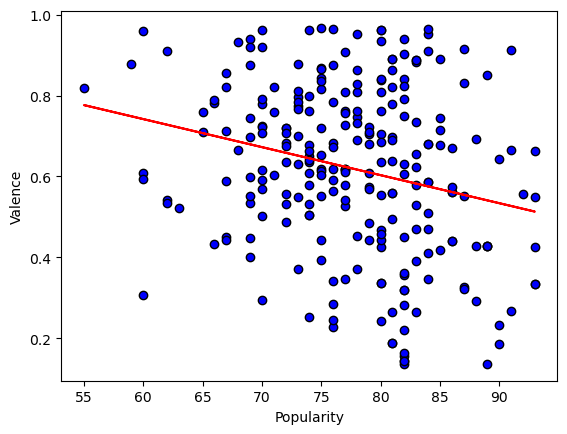

Popularity vs. Valence
The r value is: -0.23997198342705853


In [31]:
# Linear regression Test
x_values = merged_df["Popularity"]
y_values = merged_df["Valence"]

lin_reg(x_values, y_values, "Popularity vs. Valence", (0, 0))